# AML - Exercise Sheet 5.2
## Exercise 3

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
N = 10_000  # Population size
population_data = np.random.uniform(0, 1, N)	# ground truth

In [3]:
thresholds = np.linspace(0, 1, 11)  # 10 thresholds including 0 and 1
H = [lambda x, thresh=t: 1 if x >= thresh else -1 for t in thresholds]

In [13]:
def bayes_classifier(x):
    return 1 if x >= 0.5 else -1

def true_risk(f):
    misclassifications = np.mean([f(x) != bayes_classifier(x) for x in population_data])
    return misclassifications

true_risks = [true_risk(f) for f in H]

In [14]:
n = 50  # Sample size
T = 1_000  # Number of trials

epsilons = np.linspace(0, 0.5, 50)
p_epsilon = {eps: 0 for eps in epsilons}

for _ in range(T):
    sample_data = np.random.uniform(0, 1, n)
    for f, R in zip(H, true_risks):
        R_n = np.mean([f(x) != (1 if x >= 0.5 else -1) for x in sample_data])
        for eps in epsilons:
            if abs(R_n - R) >= eps:
                p_epsilon[eps] += 1

# Normalize the probabilities
p_epsilon = {eps: count / T for eps, count in p_epsilon.items()}

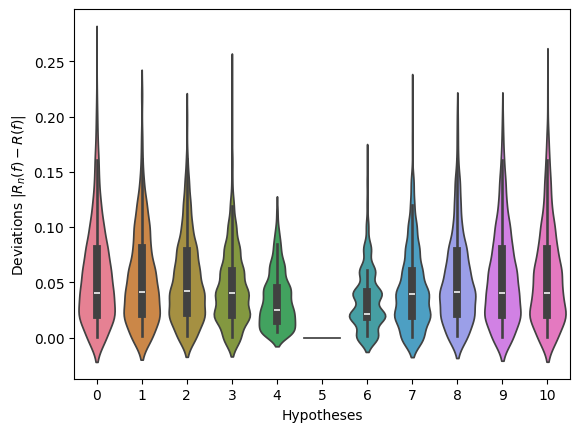

In [15]:
# Collect all deviations
deviations = []
for f, R in zip(H, true_risks):
    sample_devs = []
    for _ in range(T):
        sample_data = np.random.uniform(0, 1, n)
        R_n = np.mean([f(x) != (1 if x >= 0.5 else -1) for x in sample_data])
        sample_devs.append(abs(R_n - R))
    deviations.append(sample_devs)

sns.violinplot(data=deviations)
plt.xlabel('Hypotheses')
plt.ylabel('Deviations $|R_n(f) − R(f)|$')
plt.show()

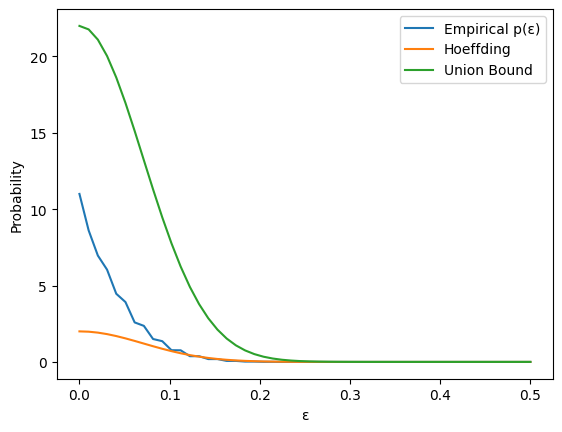

In [16]:
# Hoeffding's inequality and union bound
hoeffding = [2 * np.exp(-2 * eps**2 * n) for eps in epsilons]
union_bound = [len(H) * h for h in hoeffding]

plt.plot(epsilons, [p_epsilon[eps] for eps in epsilons], label='Empirical p(ε)')
plt.plot(epsilons, hoeffding, label='Hoeffding')
plt.plot(epsilons, union_bound, label='Union Bound')
plt.xlabel('ε')
plt.ylabel('Probability')
plt.legend()
plt.show()